# Linear regression and training/testing methodology



By this point you should be familar with the ways in which we present data.

Regression is a fundamental concept in statistics and machine learning. It is a statistical method that analyzes the relationships between a dependent variable (also known as the target) and one or more independent variables (predictors or features). The primary goal of regression analysis is to understand and model the relationship between these variables. Regression is used for various purposes, such as prediction, inference, and understanding the strength and nature of relationships between variables.

Here are some key points to understand about regression:

**Dependent Variable (Target):** The dependent variable is the variable we want to predict or explain. In regression, it is represented as 'y.'

**Independent Variables (Features or Predictors):** These are the variables that are used to predict the dependent variable. In simple linear regression, there is only one independent variable, while multiple linear regression involves more than one.

**Linear Relationship:** Regression assumes a linear relationship between the independent variables and the dependent variable. The goal is to find the linear equation that best describes this relationship.

**Regression Equation:** The regression equation represents the relationship between the dependent and independent variables. In simple linear regression, the equation is of the form: y = mx + b, where 'm' is the slope, and 'b' is the intercept. In multiple linear regression, the equation becomes more complex.

**Residuals:** Residuals are the differences between the observed (actual) values of the dependent variable and the predicted values from the regression equation. Minimizing the sum of squared residuals is a common method for finding the best-fit line.

### Types of Regression:

Simple Linear Regression: Involves one independent variable.

Multiple Linear Regression: Involves more than one independent variable.

Polynomial Regression: Fits a polynomial equation to the data.

Logistic Regression: Used for classification problems with binary outcomes.

Ridge and Lasso Regression: Used for regularization in multiple linear regression.

### Assumptions of Regression:


Linearity: The relationship between variables is linear.

Independence: The observations are independent of each other.

Homoscedasticity: The variance of residuals is constant.

Normality: Residuals are normally distributed.

### Applications:

Economics: Predicting factors affecting GDP.
Medicine: Predicting patient outcomes based on medical data.
Finance: Predicting stock prices.
Marketing: Analyzing the impact of advertising on sales.
Regression is a powerful tool for data analysis, predictive modeling, and understanding the relationships between variables. It's widely used in various fields, and there are different variations of regression techniques to suit specific problems and data structures.

## Answer the following about regression:

1) What Is the Fundamental Concept of Linear Regression?
   * Explain the core concept of linear regression and how it models the relationship between variables.
    > Regression is a statistical method that analyzes the relationships between a dependent variable (also known as the target) and one or more independent variables (predictors or features). Linear Regression assumes a linear relationship between the independent variables and the dependent variable. The goal is to find the linear equation that best describes this relationship.
2) How Does Simple Linear Regression Differ from Multiple Linear Regression?
    * Compare and contrast simple linear regression with multiple linear regression in terms of the number of independent variables and their applications.
    > These are the variables that are used to predict the dependent variable. In simple linear regression, there is only one independent variable, while multiple linear regression involves more than one.
3) What Are the Assumptions of Regression Analysis?
    * Describe the key assumptions underlying regression models, such as linearity, independence, homoscedasticity, and normality.
    > Linearity: The relationship between variables is linear.

    > Independence: The observations are independent of each other.
    
    > Homoscedasticity: The variance of residuals is constant.
    
    > Normality: Residuals are normally distributed.

### Fitting Linear Regression model

In this workshop, you will try a few ways to fit a linear regression model and compare results for different metrics. Your task will be to predict price on the next day given data from previous day.


You will first familiarise yourself with the paper, which also investigates prediction of bitcoin prices based on the similar dataset. The paper uses performance metric, which we discussed in the lecture: coefficient of determination (𝑅2):
$$R^{2}=\left(\left(\frac{1}{N}\right) \cdot \frac{\left(x_{i}-\bar{x}\right)\cdot\left(y_{i}-y^{p}\right)}{ \sigma_{x}\cdot \sigma_{y}}\right)^{2}$$
where N is the number of observations used to fit the model, Σ is the summation symbol, $𝑥_𝑖$ is the x value for observation i, $\bar{x}$ is the mean x value, $𝑦_𝑖$ is the y value for observation i, $y^p$ is the predicted y value, $𝜎_𝑥$ is the standard deviation of x, and $𝜎_𝑦$ is the standard deviation of y. Notice, however, that the formula looks different. You may wish to spend some time and derive this formula from the one we discussed in the lecture.

In this workshop, you will use coefficient of determination (𝑅2) to compare your results with those in the paper, but you will use sklearn implementation of this metric.


### To do

1. Supply missing code to complete the regression
2. Try regression with and without scaling and compare results

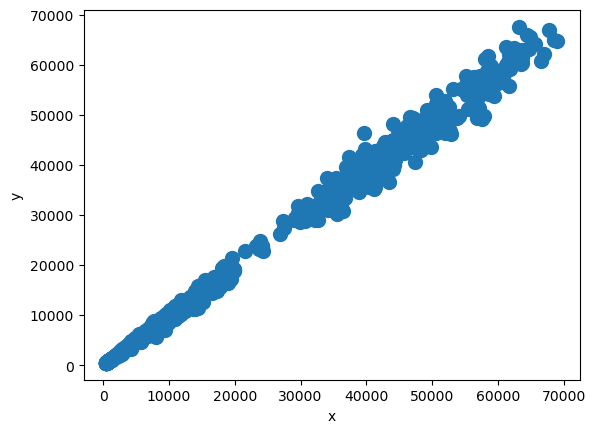

In [2]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# hyper params
test_size = 0.3
scale = False

# read the Bitcoin Historical Data.csv dataset into pandas dataframe
df = pd.read_csv("Bitcoin Historical Data1.csv")
df = df.drop("Date", axis=1)
df.head()

# if scale:
#     print("Scaling")
#     df = <your code here>
# else:
#     print("NO Scaling")

# # shuffle the DataFrame rows
# df = df.sample(frac = 1, random_state=100)

y = df.pop('Price')
X = np.array(df)

# split into train and test part, initially 70/30 x_train, y_train, x_test, y_test
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3)

y_train = np.array(y_train).reshape(len(y_train),1)
y_test = np.array(y_test).reshape(len(y_test),1)

# # visualise data of number_of_points from training, giving different attributes of x_train for x axis
number_of_points = 100
plt.scatter(X_train[:,1],y_train,s=number_of_points)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [3]:
#creating a model

# creating a object
regressor = LinearRegression()

#training the model
regressor.fit(X_train, y_train)

#using the training dataset for the prediction
y_pred = regressor.predict(X_test)

# Performance Results
print("coefficient of determination R-Squared: ", r2_score(y_test,y_pred))


coefficient of determination R-Squared:  0.9968920058735014


### Regression with Scaling

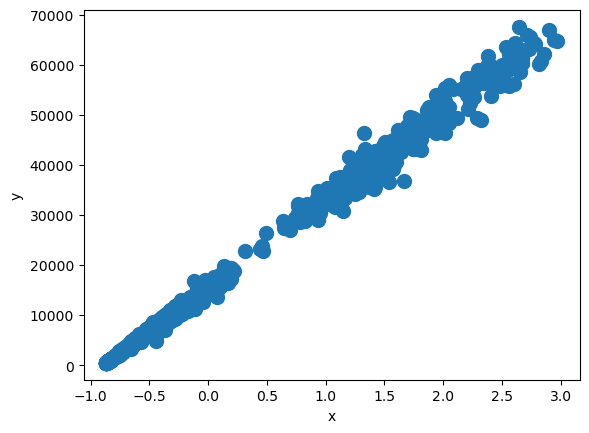

In [6]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# hyper params
test_size = 0.3
scale = False

# read the Bitcoin Historical Data.csv dataset into pandas dataframe
df = pd.read_csv("Bitcoin Historical Data1.csv")
df = df.drop("Date", axis=1)
df.head()

y = df.pop('Price')
X = np.array(df)

# split into train and test part, initially 70/30 x_train, y_train, x_test, y_test
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3)

y_train = np.array(y_train).reshape(len(y_train),1)
y_test = np.array(y_test).reshape(len(y_test),1)

# Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# # visualise data of number_of_points from training, giving different attributes of x_train for x axis
# number_of_points = 100
plt.scatter(X_train[:,1],y_train,s=number_of_points)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [7]:
#creating a model

# creating a object
regressor = LinearRegression()

#training the model
regressor.fit(X_train, y_train)

#using the training dataset for the prediction
y_pred = regressor.predict(X_test)

# Performance Results
print("coefficient of determination R-Squared: ", r2_score(y_test,y_pred))


coefficient of determination R-Squared:  0.9968153303123342
